In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import string
from matplotlib import gridspec

import time
import pickle

import memory_profiler

%load_ext memory_profiler

from pathlib import Path

In [2]:
mpl.__version__

'3.6.2'

In [3]:
import black
import jupyter_black

jupyter_black.load(line_length=79)

In [4]:
%load_ext autoreload
%autoreload 2

from pubmed_landscape_src.plotting import *

In [5]:
variables_path = Path("../../results/variables")
figures_path = Path("../../results/figures/final")
berenslab_data_path = Path("/gpfs01/berens/data/data/pubmed_processed")

In [6]:
plt.style.use("../matplotlib_style.txt")

# Fig S4: 2D embedding based on the TF-IDF representation of the PubMed dataset

## Import

In [7]:
tsne_tfidf_reparsed = np.load(variables_path / "tsne_tfidf_reparsed.npy")

In [8]:
# load
# legend colors
pickle_in = open(variables_path / "colors_new_legend.pkl", "rb")
colors_new_legend = pickle.load(pickle_in)

colors_new = np.load(variables_path / "colors_new.npy", allow_pickle=True)

In [9]:
# save
colors_per_year_reparsed = np.load(
    variables_path / "colors_per_year_reparsed.npy"
)

## Plot

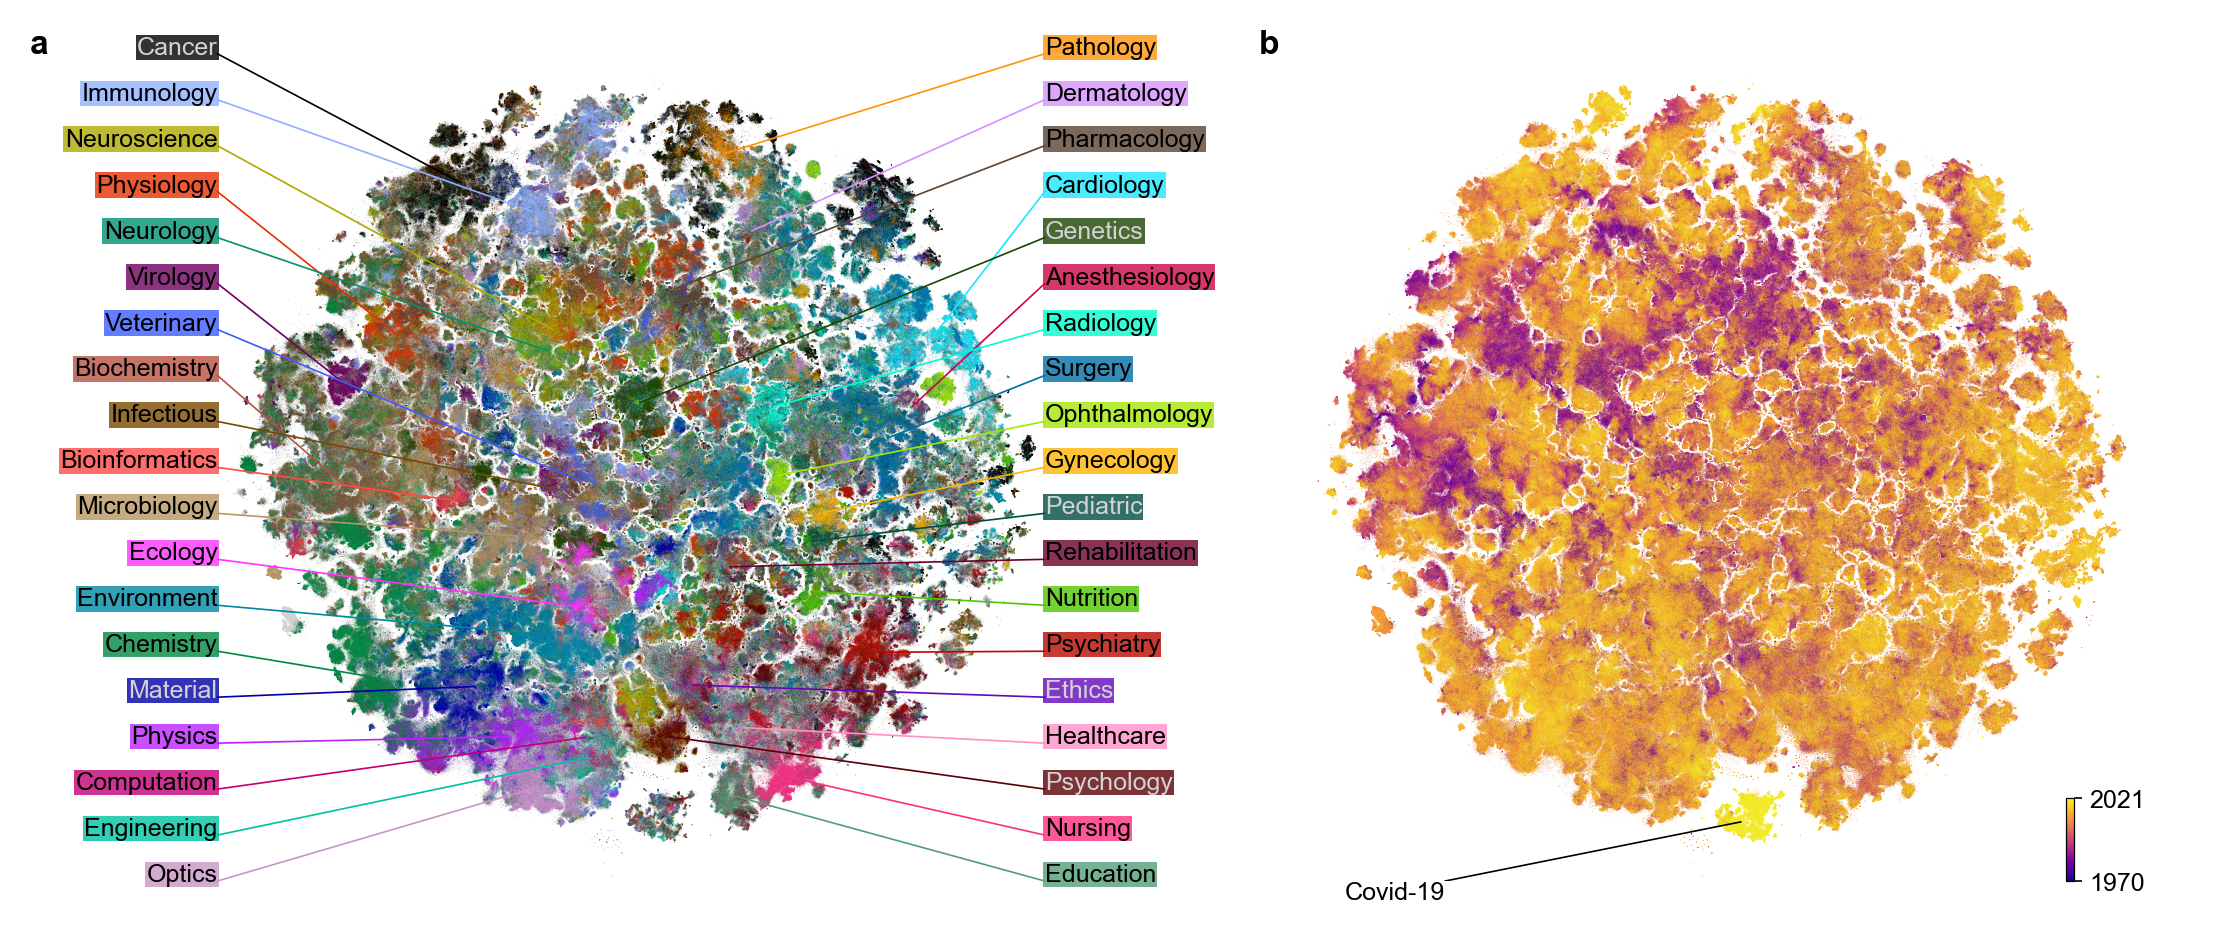

In [11]:
%matplotlib inline

fig, ax = plt.subplots(
    1, 2, figsize=(7.2, 3.0), dpi=300, sharey=True, layout="constrained"
)

txtkwargs = dict(size=8, weight="bold", va="top", ha="left")
x_lim = (-210, 210)
y_lim = (-210, 210)


# subplot 1
plot_tsne_colors(
    tsne_tfidf_reparsed,
    colors_new,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax[0],
    plot_type="subplot_2",
)
plot_label_tags(
    tsne_tfidf_reparsed,
    colors_new,
    colors_new_legend,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax[0],
    fontsize=6,
    rs=2,
)
ax[0].text(
    -0.15,
    1.03,
    string.ascii_lowercase[0],
    transform=ax[0].transAxes,
    **txtkwargs
)

# subplot 2
plot_tsne_years(
    tsne_tfidf_reparsed,
    colors_per_year_reparsed,
    x_lim=x_lim,
    y_lim=y_lim,
    ax=ax[1],
    fontsize=6,
    colorbar=True,
    plot_type="subplot",
)
ax[1].plot([10, -140], [-180, -210], c="k", linewidth=0.4)
ax[1].text(-140, -210, "Covid-19", fontsize=6, ha="right", va="top")
ax[1].text(
    0, 1.03, string.ascii_lowercase[1], transform=ax[1].transAxes, **txtkwargs
)

fig.savefig(figures_path / "fig_S4_general_embedding_tfidf.png", dpi=300)
fig.savefig(figures_path / "fig_S4_general_embedding_tfidf.pdf", dpi=300)